<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Backpropagation Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn. 

In [25]:
import pandas as pd
import numpy as np
x1 = [0, 0, 1, 0, 1, 1, 0]
x2 = [0, 1, 0, 1, 0, 1, 0]
x3 = [1, 1, 1, 0, 0, 1, 0]
y = [0, 1, 1, 1, 1, 0, 0]
df = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y': y})
df

,x1,x2,x3,y
0,0,0,1,0
1,0,1,1,1
2,1,0,1,1
3,0,1,0,1
4,1,0,0,1
5,1,1,1,0
6,0,0,0,0


In [39]:
X = df[['x1','x2','x3']].values.astype(float)
y = df[['y']].values.astype(float)

In [49]:
y

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.]])

In [54]:
np.rint([[1.5]])

array([[2.]])

In [40]:

class NeuralNetwork(object):
    
    def __init__(self):
        # Set up Architecture of Neural Network
        self.inputs = 3
        self.hiddenNodes =  4
        self.outputNodes = 1

        # Initial Weights
        # 2x3 Matrix Array for the First Layer
        self.weights1 = np.random.randn(self.inputs, self.hiddenNodes)
       
        # 3x1 Matrix Array for Hidden to Output
        self.weights2 = np.random.randn(self.hiddenNodes, self.outputNodes)
        
    def sigmoid(self, s):
        return 1 / (1+np.exp(-s))
    
    def sigmoidPrime(self, s):
        return s * (1-s)
    
    def feed_forward(self, X):
        """
        Calculate the NN inference using feed forward pass.
        """
        
        # Weighted sum of inputs and hidden layer
        self.hidden_sum = np.dot(X, self.weights1)
        
        # Activation of the weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # Weighted sum of hidden layer to output layer
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        # Final Activation of Output
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
    
    def backward(self, X, y, o):
        #print('error',o)
        
        self.o_error = y - o #error in output
        #print('o_error',self.o_error)
        #Size of Adjustment from hidden => output
        self.o_delta = self.o_error * self.sigmoidPrime(o) # apply derivate of sigmoid to error
        #print('sigmoid',self.sigmoidPrime(o))
        # z2 error: how much our input => hidden weights weights were off
        #print('weights',self.weights2)
        #print('o_delta', self.o_delta)
        self.z2_error = self.o_delta.dot(self.weights2.T)
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.activated_hidden)
        
        #Adjustment hidden => output weights
        self.weights2 += self.activated_hidden.T.dot(self.o_delta)
        
        #Adjustment input => hidden weights
        self.weights1 += X.T.dot(self.z2_delta)
        
    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X, y, o)

In [69]:
# Train my 'net
nn = NeuralNetwork()

for i in range(1500):
    if (i+1 in [1,2,3,4,5]) or ((i+1) % 200 ==0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
        #print('Actual Output: \n', y)
        print('Predicted Output: \n', str(nn.feed_forward(X)))
        print("Loss: \n", str(np.mean(np.square(y - nn.feed_forward(X)))))
    nn.train(X,y)
    if np.array_equal(np.rint(nn.feed_forward(X)), y):
        print(f'Final Predicted Output: \n{ np.rint(nn.feed_forward(X))}')
        print(f'Epoch: {i+1}')
        break
        
    

+---------EPOCH 1---------+
Predicted Output: 
 [[0.51477897]
 [0.69782621]
 [0.37238396]
 [0.67176146]
 [0.32449265]
 [0.54128777]
 [0.47888622]]
Loss: 
 0.2623690663919887
+---------EPOCH 2---------+
Predicted Output: 
 [[0.52631859]
 [0.70208314]
 [0.39575441]
 [0.67756297]
 [0.34874318]
 [0.55684932]
 [0.49303468]]
Loss: 
 0.2588776974785255
+---------EPOCH 3---------+
Predicted Output: 
 [[0.53407531]
 [0.70367792]
 [0.41501916]
 [0.68080487]
 [0.36968044]
 [0.56881508]
 [0.50357357]]
Loss: 
 0.2559387162339421
+---------EPOCH 4---------+
Predicted Output: 
 [[0.53896245]
 [0.70342557]
 [0.43077753]
 [0.68223959]
 [0.38760998]
 [0.57803269]
 [0.5112662 ]]
Loss: 
 0.2534227519233255
+---------EPOCH 5---------+
Predicted Output: 
 [[0.54171205]
 [0.70192808]
 [0.44364606]
 [0.68243168]
 [0.40293433]
 [0.58518723]
 [0.51675981]]
Loss: 
 0.25123576855060054
Final Predicted Output: 
[[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]]
Epoch: 155


## Try building/training a more complex MLP on a bigger dataset.

Use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the cannonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


In [254]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import keras
from keras.datasets import mnist
def vectorize(n):
    res = np.zeros((10,1))
    res[n]=1
    return res

(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_train = [vectorize(i) for i in y_train]

#scale
x_train = x_train/355
x_test = x_test/355
#reshape
x_train = x_train.reshape(60000, 784, 1)
x_test = x_test.reshape(10000, 784, 1)

1

In [192]:
np.zeros((10,1))[2]=1
def 

In [169]:
len(mnist.load_data()[0][0])

60000

In [115]:
len(mnist.load_data()[1][0])

10000

In [255]:
import random

import numpy as np

class Network(object):

    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""

        training_data = list(training_data)
        n = len(training_data)

        if test_data:
            test_data = list(test_data)
            n_test = len(test_data)

        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print("Epoch {} : {} / {}".format(j,self.evaluate(test_data),n_test));
            else:
                print("Epoch {} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        print('.')
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        #print(test_results)
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)

#### Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))
# code borrowed from: http://neuralnetworksanddeeplearning.com/chap1.html updated to python3 and using keras to load dataset

In [257]:
net = Network([784, 15, 10])
net.SGD(zip(x_train, y_train), 30, 10, 3.0, test_data=zip(x_test, y_test))

.
Epoch 0 : 8944 / 10000
.
Epoch 1 : 9148 / 10000
.
Epoch 2 : 9235 / 10000
.
Epoch 3 : 9253 / 10000
.
Epoch 4 : 9267 / 10000
.
Epoch 5 : 9305 / 10000
.
Epoch 6 : 9323 / 10000
.
Epoch 7 : 9350 / 10000
.
Epoch 8 : 9367 / 10000
.
Epoch 9 : 9335 / 10000
.
Epoch 10 : 9389 / 10000
.
Epoch 11 : 9361 / 10000
.
Epoch 12 : 9362 / 10000
.
Epoch 13 : 9342 / 10000
.
Epoch 14 : 9362 / 10000
.
Epoch 15 : 9384 / 10000
.
Epoch 16 : 9388 / 10000
.
Epoch 17 : 9375 / 10000
.
Epoch 18 : 9378 / 10000
.
Epoch 19 : 9372 / 10000
.
Epoch 20 : 9396 / 10000
.
Epoch 21 : 9386 / 10000
.
Epoch 22 : 9353 / 10000
.
Epoch 23 : 9418 / 10000
.
Epoch 24 : 9353 / 10000
.
Epoch 25 : 9393 / 10000
.
Epoch 26 : 9378 / 10000
.
Epoch 27 : 9373 / 10000
.
Epoch 28 : 9389 / 10000
.
Epoch 29 : 9392 / 10000


In [259]:
# 94% accuracy!

In [293]:
#testing
np.argmax(net.feedforward(x_test[42]))

4

In [294]:
y_test[42]

4

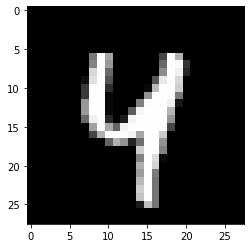

In [295]:
import matplotlib.pyplot as plt
digit = x_test[42].reshape(28,28)
plt.gray()
plt.imshow(digit)
plt.show()

## Stretch Goals: 

- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?